In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

## Normal distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)

dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


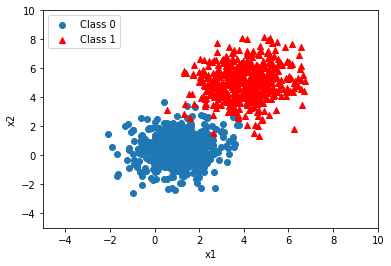

In [ ]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label = 'Class 0')

plt.scatter(dist_02[:,0],dist_02[:,1],marker = '^', color = 'r',label = 'Class 1')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [ ]:
x = np.concatenate([dist_01,dist_02])
a,b = [0]*500,[1]*500
y = np.array(a + b)
y = y.reshape(-1,1)
data = np.concatenate([x,y],axis = 1)
np.random.shuffle(data)

In [ ]:
from sklearn.model_selection import train_test_split
X = data[:,:2]
Y = data[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

In [ ]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k = 5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts = True)
    
    
    index = new_vals[1].argmax()
    
    pred = new_vals[0][index]
    
    
    return pred

In [ ]:
pred = []
for i in range(xtest.shape[0]):
  p = knn(xtrain,ytrain,xtest[i])
  pred.append(p)
pred = np.array(pred)

In [ ]:
(pred == ytest).sum()/ytest.shape[0]

0.99

Apply KNN on this dataset

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()

In [ ]:
x = data['images']

In [ ]:
y = data['target']

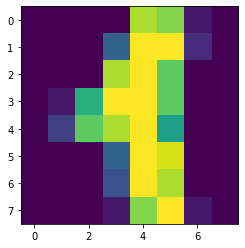

1


In [ ]:
def img(sample):

    plt.imshow(sample)
    plt.show()
    
img(x[11])
print(y[11])
